In [1]:
from project_functions1 import load_and_process
dfKennedy = load_and_process("../f1data.csv")
dfKennedy

,Position,Nationality,Team,Points,Year,Driver_ID,Driver
0,1,ITA,Alfa Romeo,30.0,1950,FAR,Nino Farina
1,2,ARG,Alfa Romeo,27.0,1950,FAN,Juan Manuel Fangio
2,3,ITA,Alfa Romeo,24.0,1950,FAG,Luigi Fagioli
3,4,FRA,Talbot-Lago,13.0,1950,ROS,Louis Rosier
4,5,ITA,Ferrari,11.0,1950,ASC,Alberto Ascari
...,...,...,...,...,...,...,...
1568,17,DEN,Haas Ferrari,1.0,2020,MAG,Kevin Magnussen
1569,18,FIN,Alfa Romeo Racing Ferrari,0.0,2020,RAI,Kimi Räikkönen
1570,19,CAN,Williams Mercedes,0.0,2020,LAT,Nicholas Latifi
1571,20,GBR,Williams Mercedes,0.0,2020,RUS,George Russell


In [2]:
from project_functions2 import load_and_process
dfJordan = load_and_process("../f1data.csv")
dfJordan

,Driver,Driver_ID,Team,Nationality,PTS,Position,Year
0,Nino Farina,FAR,Alfa Romeo,ITA,30.0,1,1950
1,Juan Manuel Fangio,FAN,Alfa Romeo,ARG,27.0,2,1950
2,Luigi Fagioli,FAG,Alfa Romeo,ITA,24.0,3,1950
3,Louis Rosier,ROS,Talbot-Lago,FRA,13.0,4,1950
4,Alberto Ascari,ASC,Ferrari,ITA,11.0,5,1950
...,...,...,...,...,...,...,...
1568,Kevin Magnussen,MAG,Haas Ferrari,DEN,1.0,17,2020
1569,Kimi Räikkönen,RAI,Alfa Romeo Racing Ferrari,FIN,0.0,18,2020
1570,Nicholas Latifi,LAT,Williams Mercedes,CAN,0.0,19,2020
1571,George Russell,RUS,Williams Mercedes,GBR,0.0,20,2020


In [3]:
from project_functions3 import load_and_process
dfEvan = load_and_process("../f1data.csv")
dfEvan

,Driver,Driver_ID,Team,Nationality,PTS,Position,Year
0,Nino Farina,FAR,Alfa Romeo,ITA,30.0,1,1950
1,Juan Manuel Fangio,FAN,Alfa Romeo,ARG,27.0,2,1950
2,Luigi Fagioli,FAG,Alfa Romeo,ITA,24.0,3,1950
3,Louis Rosier,ROS,Talbot-Lago,FRA,13.0,4,1950
4,Alberto Ascari,ASC,Ferrari,ITA,11.0,5,1950
...,...,...,...,...,...,...,...
1568,Kevin Magnussen,MAG,Haas Ferrari,DEN,1.0,17,2020
1569,Kimi Räikkönen,RAI,Alfa Romeo Racing Ferrari,FIN,0.0,18,2020
1570,Nicholas Latifi,LAT,Williams Mercedes,CAN,0.0,19,2020
1571,George Russell,RUS,Williams Mercedes,GBR,0.0,20,2020


# What driver has had the best season of all time?

<AxesSubplot:xlabel='Year', ylabel='Points'>

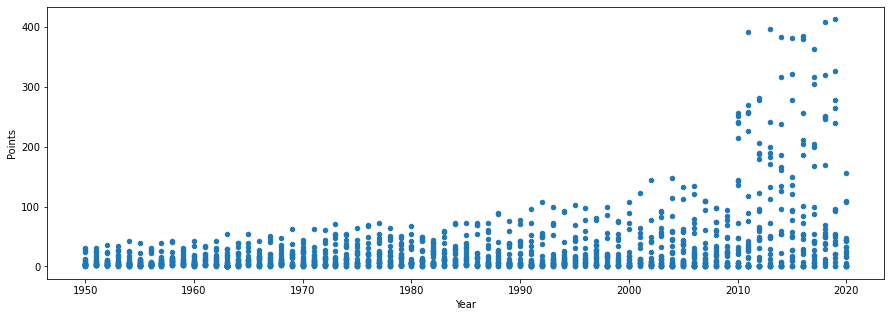

In [4]:
dfKennedy.plot(kind='scatter', x='Year', y='Points',figsize=(15,5))

In [5]:
dfKennedy[dfKennedy['Points']==dfKennedy['Points'].max()]

,Position,Nationality,Team,Points,Year,Driver_ID,Driver
1532,1,GBR,Mercedes,413.0,2019,HAM,Lewis Hamilton


This shows that the driver with the highest scoring season of all time occured in 2019 and the driver has Lewis Hamilton. He drove for Team Mercedes and scored a total of 413 in the season.

# What nationality has scored the most combined points throughout history?

<AxesSubplot:xlabel='Nationality', ylabel='PTS'>

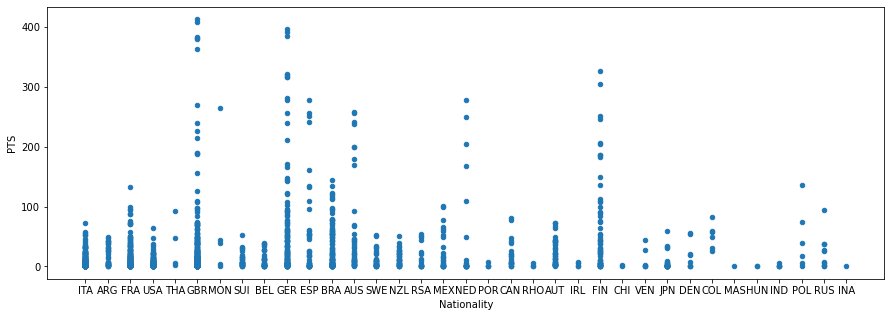

In [6]:
dfJordan.plot.scatter(x="Nationality", y="PTS", figsize=(15,5))

### Max Points:

In [7]:
dfNation = dfJordan.groupby(["Nationality"]).PTS.sum().reset_index()
dfNation[dfNation["PTS"]==dfNation["PTS"].max()]

,Nationality,PTS
12,GBR,9092.2


### Most Drivers:

In [8]:
dfDriver = dfJordan.groupby(["Nationality"]).Driver.count().reset_index()
dfDriver[dfDriver["Driver"]==dfDriver["Driver"].max()]

,Nationality,Driver
12,GBR,285


This shows that in total, drivers with a nationality of Great Britian(GBR) have earned the most points throughout history. In total they have earned nearly 9100 points with a total of 285 drivers in races. Since they have had the most drivers, this helps to explain how they reached such a high point threshold.

# What team is the highest cumulative scoring team of all time?

### Highest Cumulative points by Teams

In [14]:
dfTeam = dfEvan.groupby(["Team"]).PTS.sum().reset_index()
dfTeam[dfTeam["PTS"]==dfTeam["PTS"].max()]

,Team,PTS
47,Ferrari,9096.1


### Total Drivers in History

In [35]:
dfTime = dfEvan.groupby(["Team"]).Year.count().reset_index()
dfTime.sort_values("Year").reset_index()
dfTime[dfTime["Year"]==dfTime["Year"].max()]

,Team,Year
47,Ferrari,197


Overall, Ferrari has scored the most cumulative points in history, scoring a total of 9096 points. This is largely due to their long time existance in F1, over the 70 years of data, they have had nearly 200 drivers.

# Examination of Point distribution over time

<AxesSubplot:xlabel='Year'>

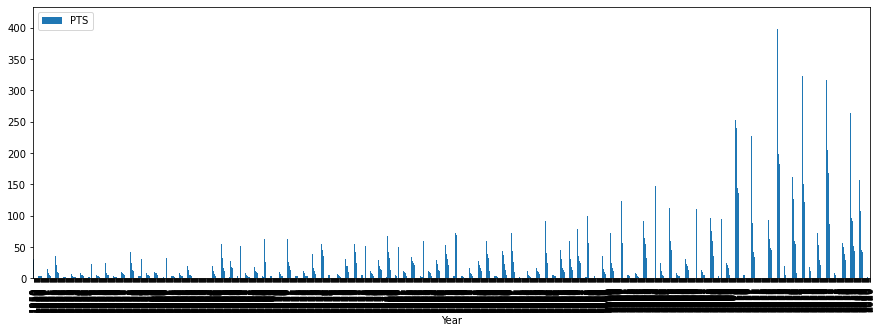

In [36]:
dfJordan.plot.bar(x="Year",y="PTS", figsize=(15,5))

This graph shows the points distributed over time. The right side of the graph is recent years and the left being the beginning of F1. This clearly indicates that there has been a trend of growing max points available in recent years.This agrees to our initial research which suggested that there have been more races in recent years.